In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import plotly.express as ply
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import numpy as np
import statistics
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
import datetime as datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import  sqrt
from sklearn.metrics import mean_squared_error

In [4]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [5]:
df=pd.read_csv('covid_19_india.csv')

In [32]:
per_cured=(df['Cured'].max()/df['Confirmed'].max())*100
per_death=(df['Deaths'].max()/df['Confirmed'].max())*100
print('Cured percentage:',per_cured,'\n'
     'Deaths percentage:',per_death)

Cured percentage: 95.91327952245065 
Deaths percentage: 2.009103798174569


In [6]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
df.set_index('Date',inplace=True)

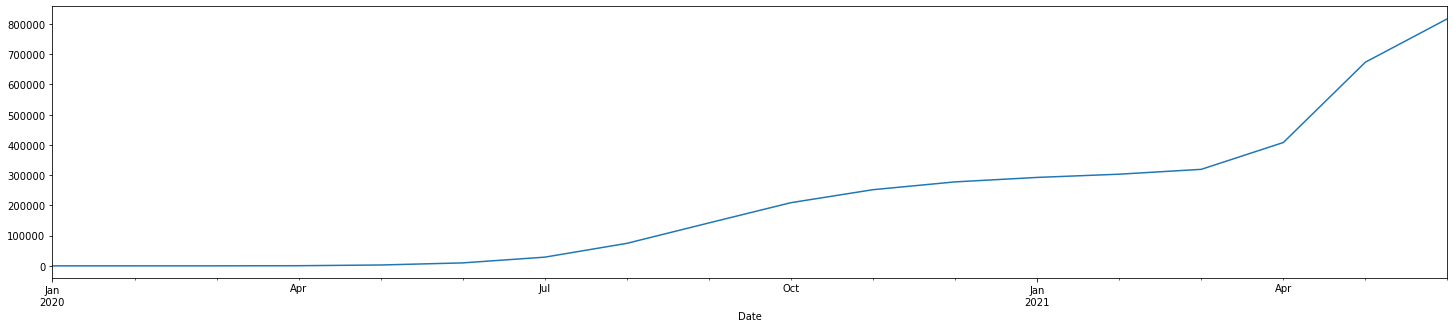

In [8]:
df['Confirmed'].resample(rule='M').mean().plot(figsize=(25,5))

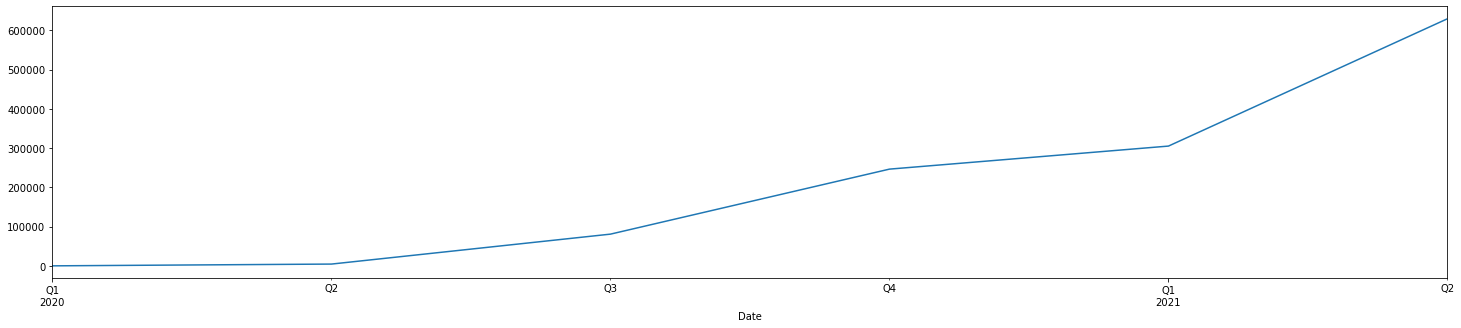

In [9]:
df['Confirmed'].resample(rule='Q').mean().plot(figsize=(25,5))

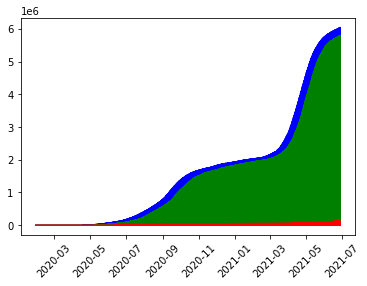

In [10]:
plt.plot(df['Confirmed'],color='blue')
plt.plot(df['Cured'],color='green')
plt.plot(df['Deaths'],color='red')
plt.xticks(rotation=45)
plt.show()

In [11]:
df1=pd.DataFrame()
df1=df.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'])

In [12]:
od=df1[df1['State/UnionTerritory']=='Odisha']

In [13]:
od.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
Date,,,,
2020-03-16,Odisha,0,0,1
2020-03-17,Odisha,0,0,1
2020-03-18,Odisha,0,0,1
2020-03-19,Odisha,0,0,1
2020-03-20,Odisha,0,0,2


In [14]:
od.tail()

,State/UnionTerritory,Cured,Deaths,Confirmed
Date,,,,
2021-06-24,Odisha,853012,3717,886946
2021-06-25,Odisha,856498,3761,890596
2021-06-26,Odisha,860142,3801,893508
2021-06-27,Odisha,863824,3848,897062
2021-06-28,Odisha,867402,3887,900470


In [15]:
od.describe()

,Cured,Deaths,Confirmed
count,470.000000,470.000000,470.000000
mean,234100.493617,1198.217021,251418.246809
std,216156.213877,1003.454067,231864.601317
min,0.000000,0.000000,1.000000
25%,8069.000000,57.250000,12098.500000
50%,282803.000000,1371.000000,296581.500000
75%,334689.000000,1916.750000,337332.500000
max,867402.000000,3887.000000,900470.000000


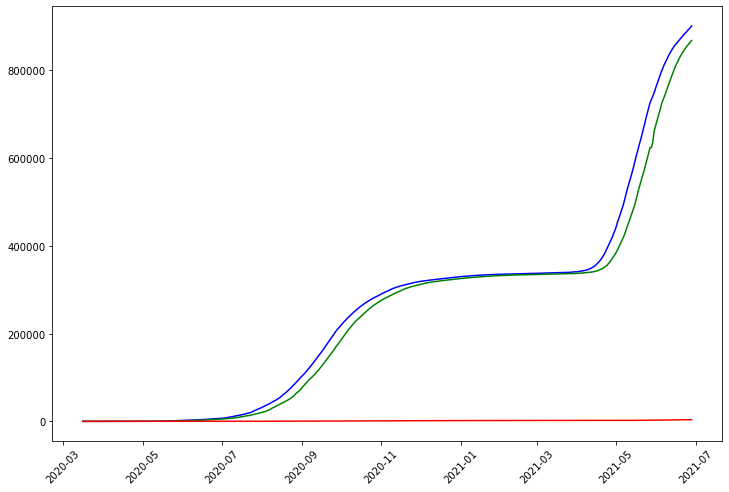

In [17]:
fig = plt.figure(figsize=(12, 8))
plt.plot(od['Confirmed'],color='blue')
plt.plot(od['Cured'],color='green')
plt.plot(od['Deaths'],color='red')
plt.xticks(rotation=45)
plt.show()

In [22]:
print('Confirmed',od['Confirmed'].sum(),'\n'
    'Cured',od['Cured'].sum(),'\n'
    'Deaths',od['Deaths'].sum())

Confirmed 118166576 
Cured 110027232 
Deaths 563162


In [31]:
per_cured=(od['Cured'].max()/od['Confirmed'].max())*100
per_death=(od['Deaths'].max()/od['Confirmed'].max())*100
print('Cured percentage:',per_cured,'\n'
     'Deaths percentage:',per_death)

Cured percentage: 96.32769553677524 
Deaths percentage: 0.431663464635135


In [33]:
od=od.resample('D').sum()
od['diff2']=od['Cured']-od['Cured'].shift(2)
auto_arima_mode_cure=auto_arima(od['diff2'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8123.782, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8123.017, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8121.838, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.625 seconds


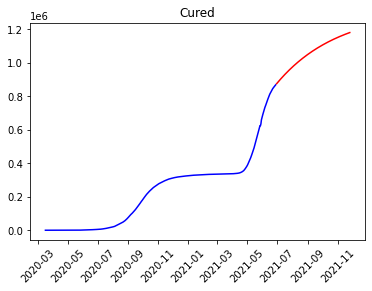

In [22]:
arima_model_cured = ARIMA(od['Cured'].dropna(), order=(4,1,0)).fit()
start = od.index.get_loc('2020-03-16')
end = od.index.get_loc('2021-06-28')
predictcu= arima_model_cured.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future_cu=arima_model_cured.predict(start=len(od)+1,end=len(od)+(150),dynamic=False)
#print("The length of pred_future values :",len(pred_future))
plt.plot(od['Cured'],color='blue')
#plt.plot(predict2,color='yellow')
plt.title('Cured')
plt.plot(pred_future_cu,color='red')
plt.xticks(rotation=45)
plt.show()

In [23]:
od=od.resample('D').sum()
od['diff3']=od['Deaths']-od['Deaths'].shift(3)
auto_arima_mode_de=auto_arima(od['diff3'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2080.076, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2374.477, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2211.175, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2147.844, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2140.419, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2118.740, Time=0.29 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2035.203, Time=0.39 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2034.102, Time=0.32 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=2133.004, Time=0.12 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=2034.714, Time=0.38 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2207.432, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=2093.040, Time=0.12 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=2036.356, Time=0.63 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=2036.046, Time=0.67 sec

Best model:  ARIMA(3,2,1)(0,0,0)

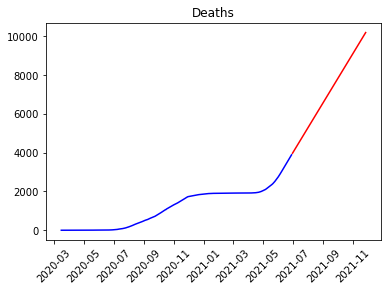

In [24]:
arima_model_deaths = ARIMA(od['Deaths'].dropna(), order=(3,2,1)).fit()
start = od.index.get_loc('2020-03-16')
end = od.index.get_loc('2021-06-28')
predictdeaths= arima_model_deaths.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future_deaths=arima_model_deaths.predict(start=len(od)+1,end=len(od)+(150),dynamic=False)
#print("The length of pred_future values :",len(pred_future))
plt.plot(od['Deaths'],color='blue')
#plt.plot(predict2,color='yellow')
plt.title('Deaths')
plt.plot(pred_future_deaths,color='red')
plt.xticks(rotation=45)
plt.show()

The length of pred_future values : 150


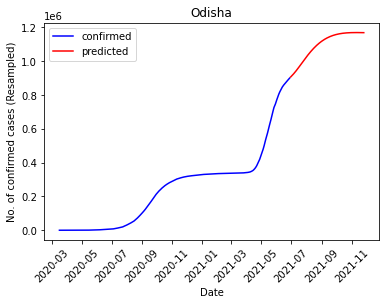

In [29]:
arima_model_424 = ARIMA(od['Confirmed'].dropna(), order=(5,1,5)).fit()
start = od.index.get_loc('2020-03-16')
end = od.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(od)+1,end=len(od)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(od['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xticks(rotation=45)
plt.title('Odisha')
plt.xlabel('Date')
plt.ylabel('No. of confirmed cases (Resampled)')
plt.legend(['confirmed','predicted'])
plt.show()

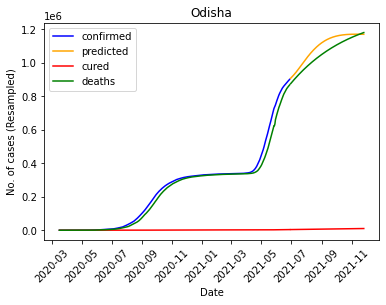

In [30]:
plt.plot(od['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='orange')
plt.plot(pred_future_deaths,color='red')
plt.plot(pred_future_cu,color='green')
plt.plot(od['Deaths'],color='red')
plt.plot(od['Cured'],color='green')
plt.xticks(rotation=45)
plt.title('Odisha')
plt.xlabel('Date')
plt.ylabel('No. of cases (Resampled)')
plt.legend(['confirmed','predicted','cured','deaths'])
plt.show()